## Loan Prediction Problem

**Problem Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.**


I took this dataset from Kaggle and cleaned it in a seprate file.

https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset

`In this scenario we are exploring & comparing multiple Ensemble learning techniques to predict the loan status of a preson based on various parameters.`


In [1]:
#importing important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r'train_clean_data.csv',index_col=0)

In [3]:
df.dropna(axis=0, inplace=True)

In [4]:
df.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,gender_Male,married_Yes,education_Not Graduate,property_area_Semiurban,property_area_Urban,self_employed_Yes,Loan_status_Y
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,1,1,0,0,1,1,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,1,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,1,0,1
5,LP001011,2,5417,4196.0,267.0,360.0,1.0,1,1,0,0,1,1,1


In [5]:
#df.rename({'Yes': 'Self_Employed'}, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 1 to 613
Data columns (total 14 columns):
Loan_ID                    517 non-null object
Dependents                 517 non-null object
ApplicantIncome            517 non-null int64
CoapplicantIncome          517 non-null float64
LoanAmount                 517 non-null float64
Loan_Amount_Term           517 non-null float64
Credit_History             517 non-null float64
gender_Male                517 non-null int64
married_Yes                517 non-null int64
education_Not Graduate     517 non-null int64
property_area_Semiurban    517 non-null int64
property_area_Urban        517 non-null int64
self_employed_Yes          517 non-null int64
Loan_status_Y              517 non-null int64
dtypes: float64(4), int64(8), object(2)
memory usage: 60.6+ KB


Similarly, fill values for all the columns. EDA, missing values and outlier treatment has been skipped

In [6]:
x = df.drop(['Loan_status_Y','Loan_ID','Dependents'],axis=1)
y = df['Loan_status_Y']

#split dataset into train and test
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y, test_size=0.3, random_state=42)

## Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [9]:
rfc_pred = rfc.predict(x_test)

In [11]:
from sklearn.metrics import classification_report , confusion_matrix

print(confusion_matrix(y_test,rfc_pred))

[[ 20  19]
 [  9 108]]


In [12]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.69      0.51      0.59        39
          1       0.85      0.92      0.89       117

avg / total       0.81      0.82      0.81       156



## Bagging meta-estimator

Bagging meta-estimator is an ensembling algorithm that can be used for both **classification (BaggingClassifier)** and **regression (BaggingRegressor)** problems. It follows the typical bagging technique to make predictions. Following are the steps for the bagging meta-estimator algorithm:

1. Random subsets are created from the original dataset (Bootstrapping).
2. The subset of the dataset includes all features.
3. A user-specified base estimator is fitted on each of these smaller sets.
4. Predictions from each model are combined to get the final result.

Parameters used in the  algorithms:

**base_estimator**:
It defines the base estimator to fit on random subsets of the dataset.
When nothing is specified, the base estimator is a decision tree.

**n_estimators**:
It is the number of base estimators to be created.
The number of estimators should be carefully tuned as a large number would take a very long time to run, while a very small number might not provide the best results.

**max_samples**:
This parameter controls the size of the subsets.
It is the maximum number of samples to train each base estimator.

**max_features**:
Controls the number of features to draw from the whole dataset.
It defines the maximum number of features required to train each base estimator.

**n_jobs**:
The number of jobs to run in parallel.
Set this value equal to the cores in your system.
If -1, the number of jobs is set to the number of cores.

**random_state**:
It specifies the method of random split. When random state value is same for two models, the random selection is same for both models.
This parameter is useful when you want to compare different models.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

model = BaggingClassifier(LogisticRegression(),n_estimators=100)

model.fit(x_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [14]:
model.score(x_test,y_test)

0.8589743589743589

 Sample code for regression problem:

In [15]:
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.17811965811965813

# AdaBoost

Adaptive boosting or AdaBoost is one of the simplest boosting algorithms. Usually, decision trees are used for modelling. Multiple sequential models are created, each correcting the errors from the last model. AdaBoost assigns weights to the observations which are incorrectly predicted and the subsequent model works to predict these values correctly.

Below are the steps for performing the AdaBoost algorithm:

1. Initially, all observations in the dataset are given equal weights.
2. A model is built on a subset of data.
3. Using this model, predictions are made on the whole dataset.
4. Errors are calculated by comparing the predictions and actual values.
5. While creating the next model, higher weights are given to the data points which were predicted incorrectly.
6. Weights can be determined using the error value. For instance, higher the error more is the weight assigned to the observation.
7. This process is repeated until the error function does not change, or the maximum limit of the number of estimators is reached.

### Ada Boost Classifier

In [8]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.8269230769230769

### Ada Boost Regressor

In [10]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.13244777456315393

# Gradient Boosting (GBM)

Gradient Boosting or GBM is another ensemble machine learning algorithm that works for both regression and classification problems. GBM uses the boosting technique, combining a number of weak learners to form a strong learner. Regression trees used as a base learner, each subsequent tree in series is built on the errors calculated by the previous tree.

We will use a simple example to understand the GBM algorithm. We have to predict the age of a group of people using the below data:

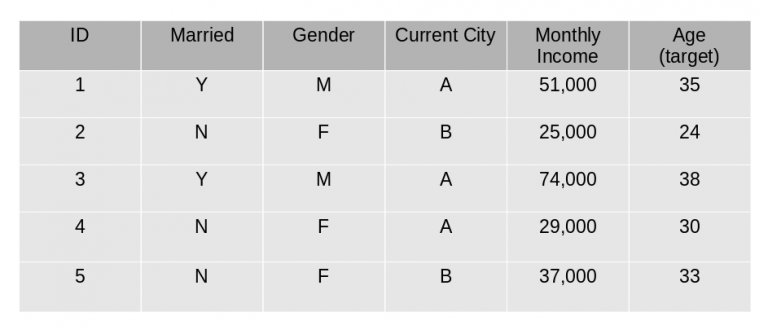

1. The mean age is assumed to be the predicted value for all observations in the dataset.
2. The errors are calculated using this mean prediction and actual values of age.

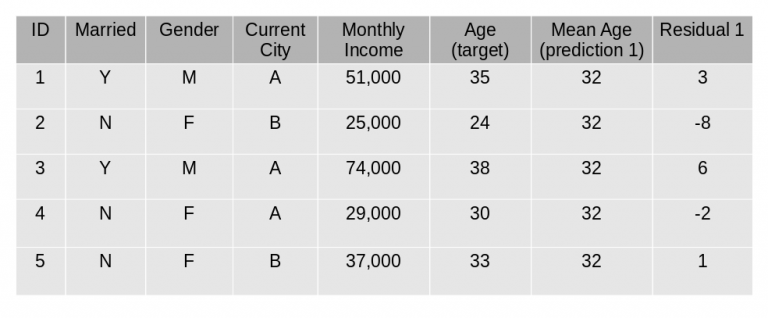

3.A tree model is created using the errors calculated above as target variable. Our objective is to find the best split to minimize the error.

4.The predictions by this model are combined with the predictions 1.

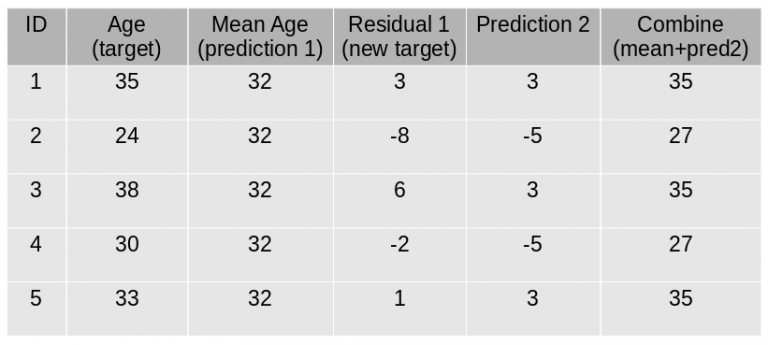

5.This value calculated above is the new prediction.

6.New errors are calculated using this predicted value and actual value.

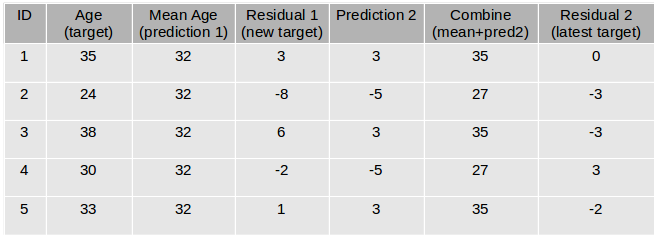

7.Steps 2 to 6 are repeated till the maximum number of iterations is reached (or error function does not change).

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.8269230769230769

### Gradient Boost regressor

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor()
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.1841870595920725

# XGBoost

XGBoost (extreme Gradient Boosting) is an advanced implementation of the gradient boosting algorithm. XGBoost has proved to be a highly effective ML algorithm. XGBoost has high predictive power and is almost 10 times faster than the other gradient boosting techniques. It also includes a variety of regularization which reduces overfitting and improves overall performance. Hence it is also known as **‘regularized boosting‘** technique.

Let us see how XGBoost is comparatively better than other techniques:

1. **Regularization**:
Standard GBM implementation has no regularisation like XGBoost.
Thus XGBoost also helps to reduce overfitting.
2. **Parallel Processing**:
XGBoost implements parallel processing and is faster than GBM .
XGBoost also supports implementation on Hadoop.
3. **High Flexibility**:
XGBoost allows users to define custom optimization objectives and evaluation criteria adding a whole new dimension to the model.
4. **Handling Missing Values**:
XGBoost has an in-built routine to handle missing values.
5. **Tree Pruning**:
XGBoost makes splits up to the max_depth specified and then starts pruning the tree backwards and removes splits beyond which there is no positive gain.
6. **Built-in Cross-Validation**:
XGBoost allows a user to run a cross-validation at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run.

Since XGBoost takes care of the missing values itself, you do not have to impute the missing values. You can skip the step for missing value imputation from the code

### Xg Boost Classification problem

pip install xgboost

In [1]:
import xgboost as xgb

model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
#model.fit(x_train, y_train)
#model.score(x_test,y_test)

### XG boost Regression problem

In [88]:
import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.19129385697867718

In [3]:
import numpy as np
np.empty((0,1),float)

array([], shape=(0, 1), dtype=float64)

## STACKING

We first define a function to make predictions on n-folds of train and test dataset. This function returns the predictions for train and test for each model.

In [187]:
from sklearn.model_selection import StratifiedKFold

def Stacking(model,train,y,test,n_fold):
    '''
    n_fold=10,
    train=x_train,
    test=x_test,
    y=y_train
    
    StratifiedKFold: used for k folds cross varidation.
    Stacking function is returning 2D numpy arrays 
    
    '''
    folds=StratifiedKFold(n_splits=n_fold,random_state=1)
    
    
    test_pred=np.empty((0,1),float)
    train_pred=np.empty((0,1),float)
    
    
    for train_indices,val_indices in folds.split(train,y.values):
        
        x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
        y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]

        model.fit(X=x_train,y=y_train)
        train_pred=np.append(train_pred,model.predict(x_val))
        
    test_pred=np.append(test_pred,model.predict(test))
    
    return test_pred.reshape(-1,1),train_pred

Now we’ll create two base models – decision tree and knn.

In [188]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)

test_pred1 ,train_pred1=Stacking(model=model1,n_fold=10, train=x_train,test=x_test,y=y_train)

train_pred1=pd.DataFrame(train_pred1)
test_pred1=pd.DataFrame(test_pred1) 

In [190]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()

test_pred2 ,train_pred2=Stacking(model=model2,n_fold=10,train=x_train,test=x_test,y=y_train)

train_pred2=pd.DataFrame(train_pred2)
test_pred2=pd.DataFrame(test_pred2)

Create a third model, logistic regression, on the predictions of the decision tree and knn models.

In [191]:
df = pd.concat([train_pred1, train_pred2], axis=1)
df_test = pd.concat([test_pred1, test_pred2], axis=1)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=1)
model.fit(df,y_train)
model.score(df_test, y_test)

0.6923076923076923

In order to simplify the above explanation, the stacking model we have created has only two levels. The decision tree and knn models are built at level zero, while a logistic regression model is built at level one. 